In [1]:
what_were_covering = {1:"data (prepare and load)",
                      2:"build model",
                      3:"fitting the model to data (training)",
                      4:"making predictions and evaluting a model (inferenc)",
                      5:"saving and loading a model",
                      6:"putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inferenc)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
print(torch.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2.1.2+cu121


In [3]:
## Data (prepare and load)

In [4]:
#权重weight和偏差bias

weight = 0.7
bias = 0.3

In [5]:
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight *X+ bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
len(X),len(y)

(50, 50)

In [7]:
train_split = int(0.8*len(X))
train_split
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [8]:
## Visualize

In [9]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    plt.figure(figsize=(10,7))
    #in blue
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
    #in green
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")
    if predictions is not None:
         plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
    plt.legend(prop={"size":14});


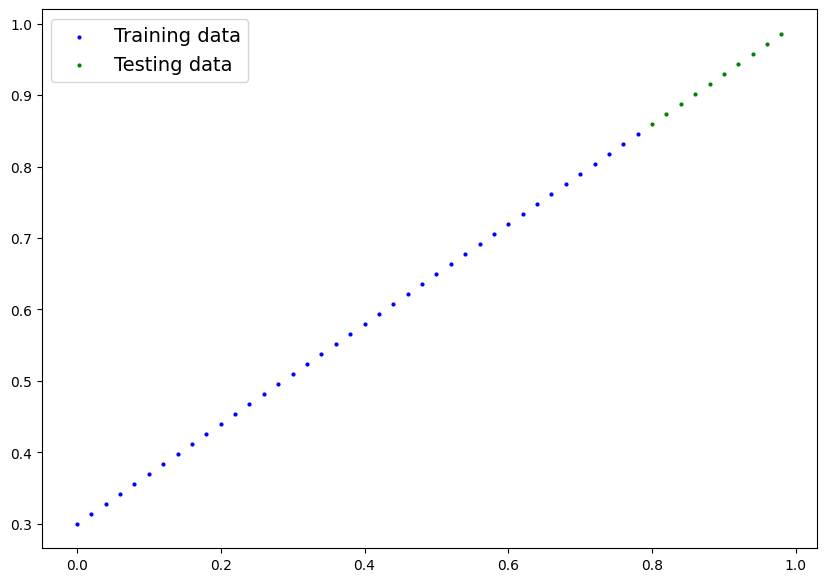

In [10]:
plot_predictions();

In [11]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))

    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.weights*x+self.bias

In [12]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0.parameters()


<generator object Module.parameters at 0x0000028BEF670120>

In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
with torch.inference_mode():
    y_pred = model_0(X_test)

# with torch.no_grad():
#     y_pred = model_0(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [16]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [17]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

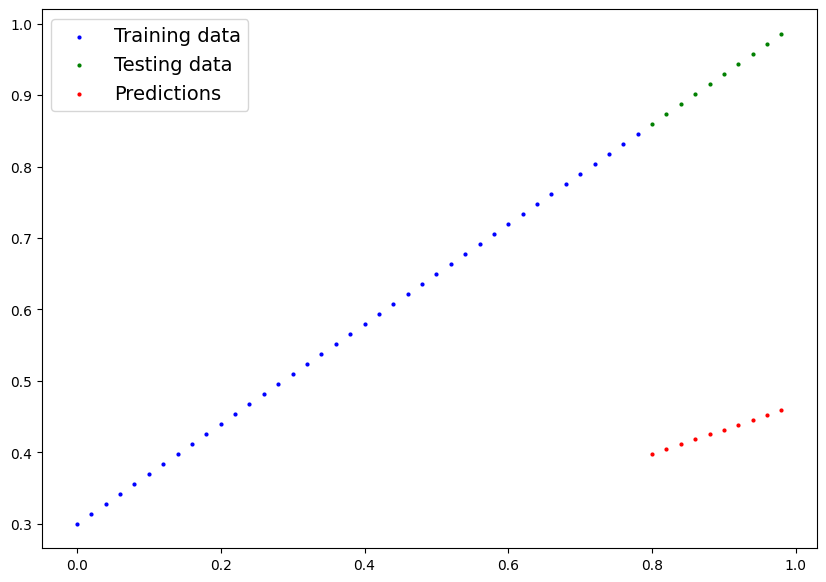

In [18]:
plot_predictions(predictions=y_pred)

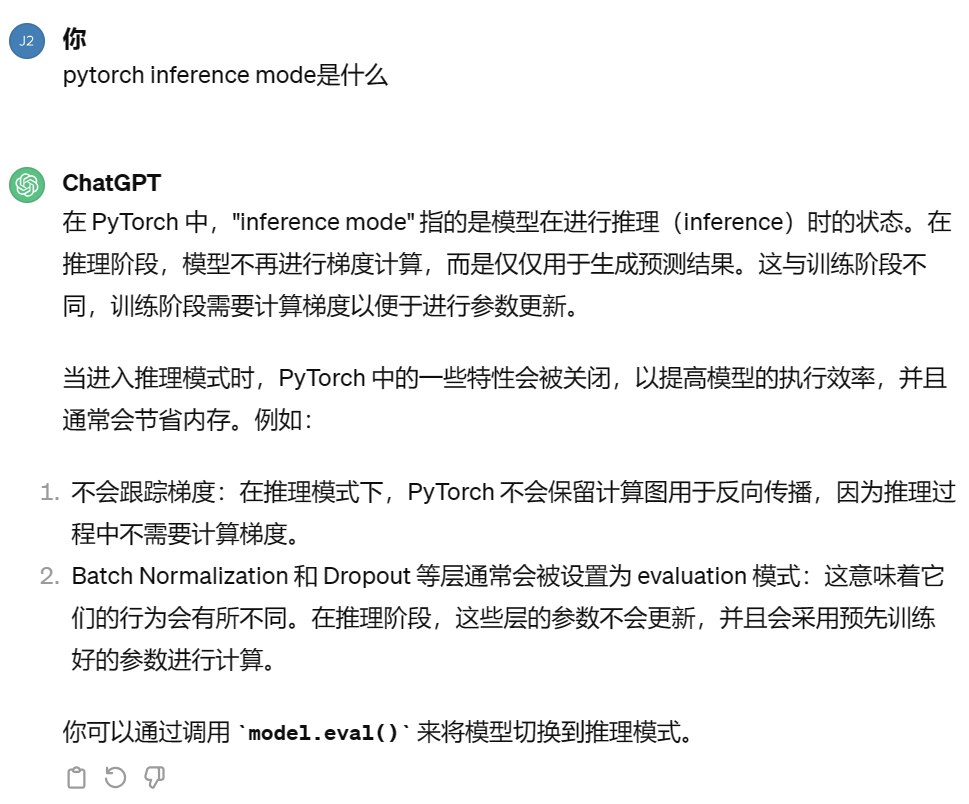


In [19]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [21]:
##set a loss function
loss_fn = nn.L1Loss()
##set a optimizer'
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [22]:
loss_fn

L1Loss()

## building a training loop in pytorch

In [23]:
list(model_0.eval().parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [24]:
  list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [25]:
torch.manual_seed(42)
epochs=200

epoch_count =[]
loss_values =[]
test_loss_values =[]

for epoch in range(epochs):
    model_0.train()
  
    ## 1. forward pass
    y_pred = model_0(X_train)

    ## 2. calculate the loss
    loss =  loss_fn(y_pred,y_train)
    # print(f"loss:{loss}")
    
    ## 3. optimizer zero grad
    optimizer.zero_grad()

    ## 4. perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    ## 5.step the optimizer
    optimizer.step()

    
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred,y_test)
    if epoch%10 == 0:
        epoch_count.append(epoch) 
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f"Epoch:{epoch}|Loss:{loss}|test loss:{test_loss}")
        print(model_0.state_dict())
        
        print(model_0.state_dict())
        

Epoch:0|Loss:0.31288138031959534|test loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10|Loss:0.1976713240146637|test loss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20|Loss:0.08908725529909134|test loss:0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:30|Loss:0.053148526698350906|test loss:0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:40|Loss:0.04543796554207802|test loss:0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
OrderedDict([('weights', 

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [27]:
np.array(torch.tensor(loss_values).numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

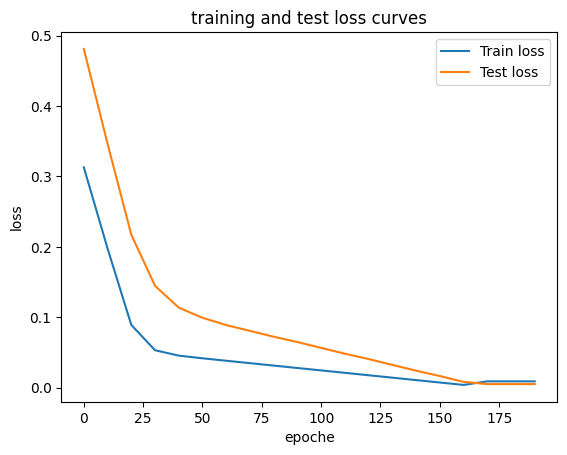

In [28]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epoche")
plt.legend();

In [29]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)


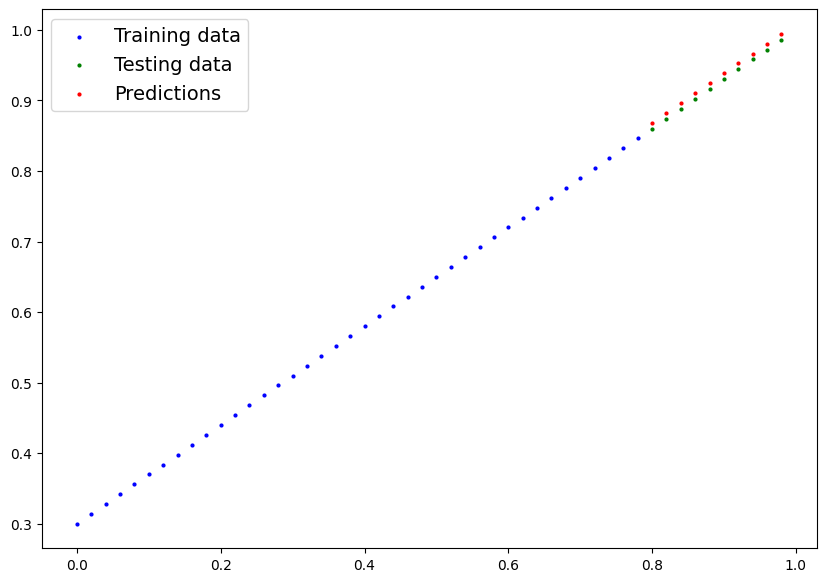

In [30]:
plot_predictions(predictions=y_pred_new)

## saving

1. torch.save()
2. torch.load()
3. torch.nn.Module.load_state_dict()

https://pytorch.org/tutorials/beginner/saving_loading_models.html

## all

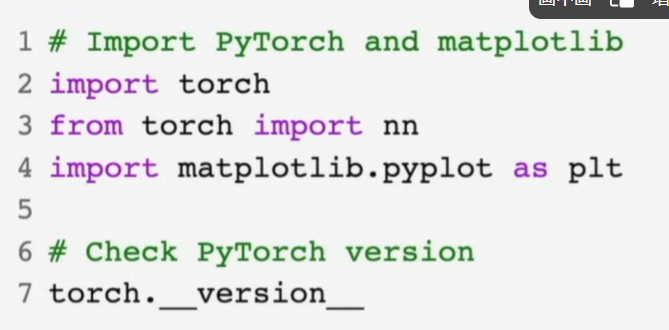

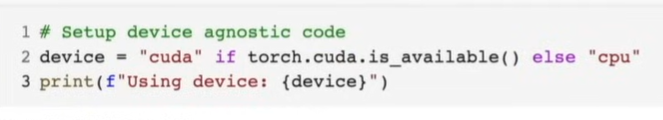

In [31]:
##setup device agnostic code
device= "cuda"if torch.cuda.is_available() else "cpu"
device

'cuda'

## Data

In [32]:
weight = 0.7
bias =0.3

start = 0
end =1
step = 0.02

X =torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [33]:
train_split = int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test =X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

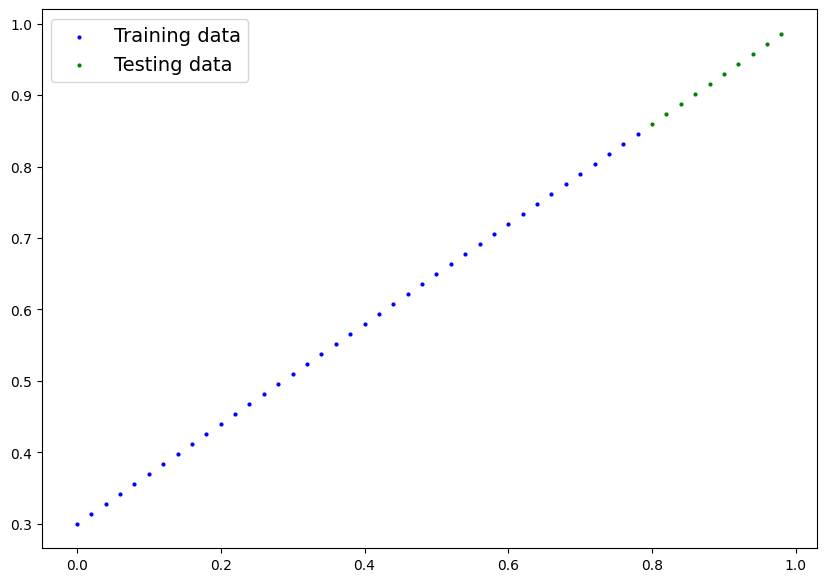

In [34]:
plot_predictions(X_train,y_train,X_test,y_test)

In [35]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features = 1,
                                      out_features= 1)
    def forward(self, X:torch.Tensor)->torch.Tensor:
        return self.linear_layer(X)

torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [36]:
next(model_1.parameters()).device

device(type='cpu')

In [37]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [38]:
loss.fn= nn.L1Loss()

optimizer =torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [39]:
torch.manual_seed(42)

epochs = 200

X_train =X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)

    loss= loss_fn(y_pred,y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred,y_test)

    if epoch % 10 ==0:
        print(f"Epoch:{epoch}|Loss{loss}|Test loss:{test_loss}")


Epoch:0|Loss0.5551779866218567|Test loss:0.5739762187004089
Epoch:10|Loss0.439968079328537|Test loss:0.4392664134502411
Epoch:20|Loss0.3247582018375397|Test loss:0.30455657839775085
Epoch:30|Loss0.20954833924770355|Test loss:0.16984669864177704
Epoch:40|Loss0.09433845430612564|Test loss:0.03513690456748009
Epoch:50|Loss0.023886388167738914|Test loss:0.04784907028079033
Epoch:60|Loss0.019956795498728752|Test loss:0.045803118497133255
Epoch:70|Loss0.016517987474799156|Test loss:0.037530567497015
Epoch:80|Loss0.013089174404740334|Test loss:0.02994490973651409
Epoch:90|Loss0.009653178043663502|Test loss:0.02167237363755703
Epoch:100|Loss0.006215683650225401|Test loss:0.014086711220443249
Epoch:110|Loss0.00278724217787385|Test loss:0.005814164876937866
Epoch:120|Loss0.0012645035749301314|Test loss:0.013801801018416882
Epoch:130|Loss0.0012645035749301314|Test loss:0.013801801018416882
Epoch:140|Loss0.0012645035749301314|Test loss:0.013801801018416882
Epoch:150|Loss0.0012645035749301314|Test 

In [40]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [41]:
model_1.eval()

with torch.inference_mode():
    y_pred = model_1(X_test)
y_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

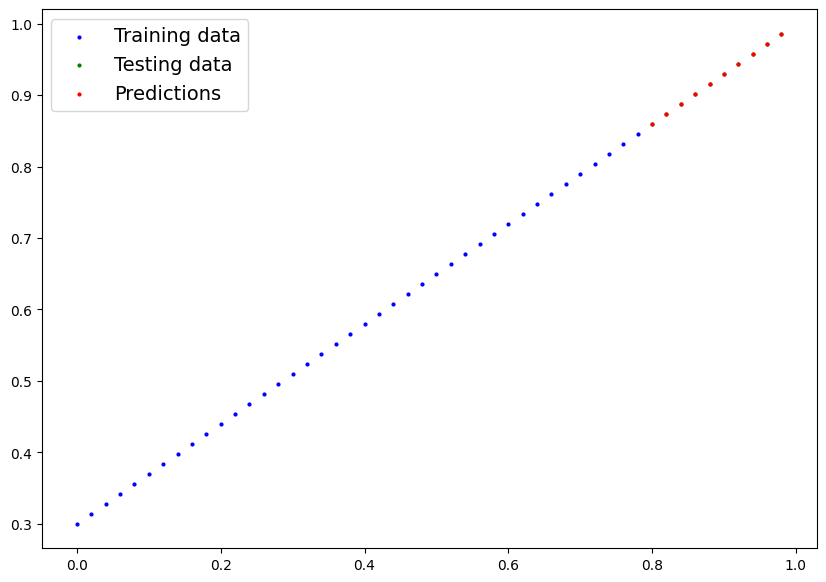

In [44]:
plot_predictions(predictions=y_pred.cpu())

In [49]:
from pathlib import Path

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH
print(f"saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
          f=MODEL_SAVE_PATH)

saving model to:models\01_model_1.pth


In [50]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

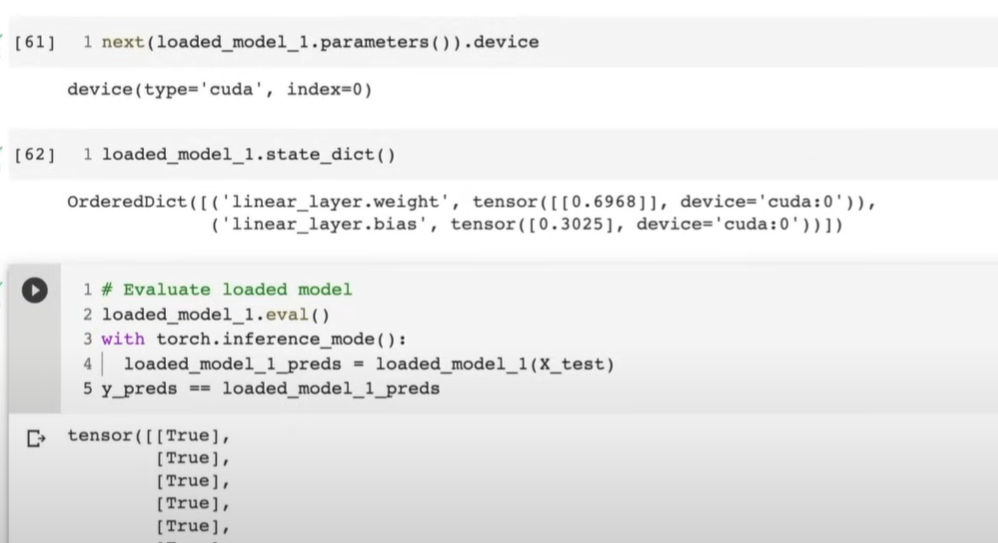

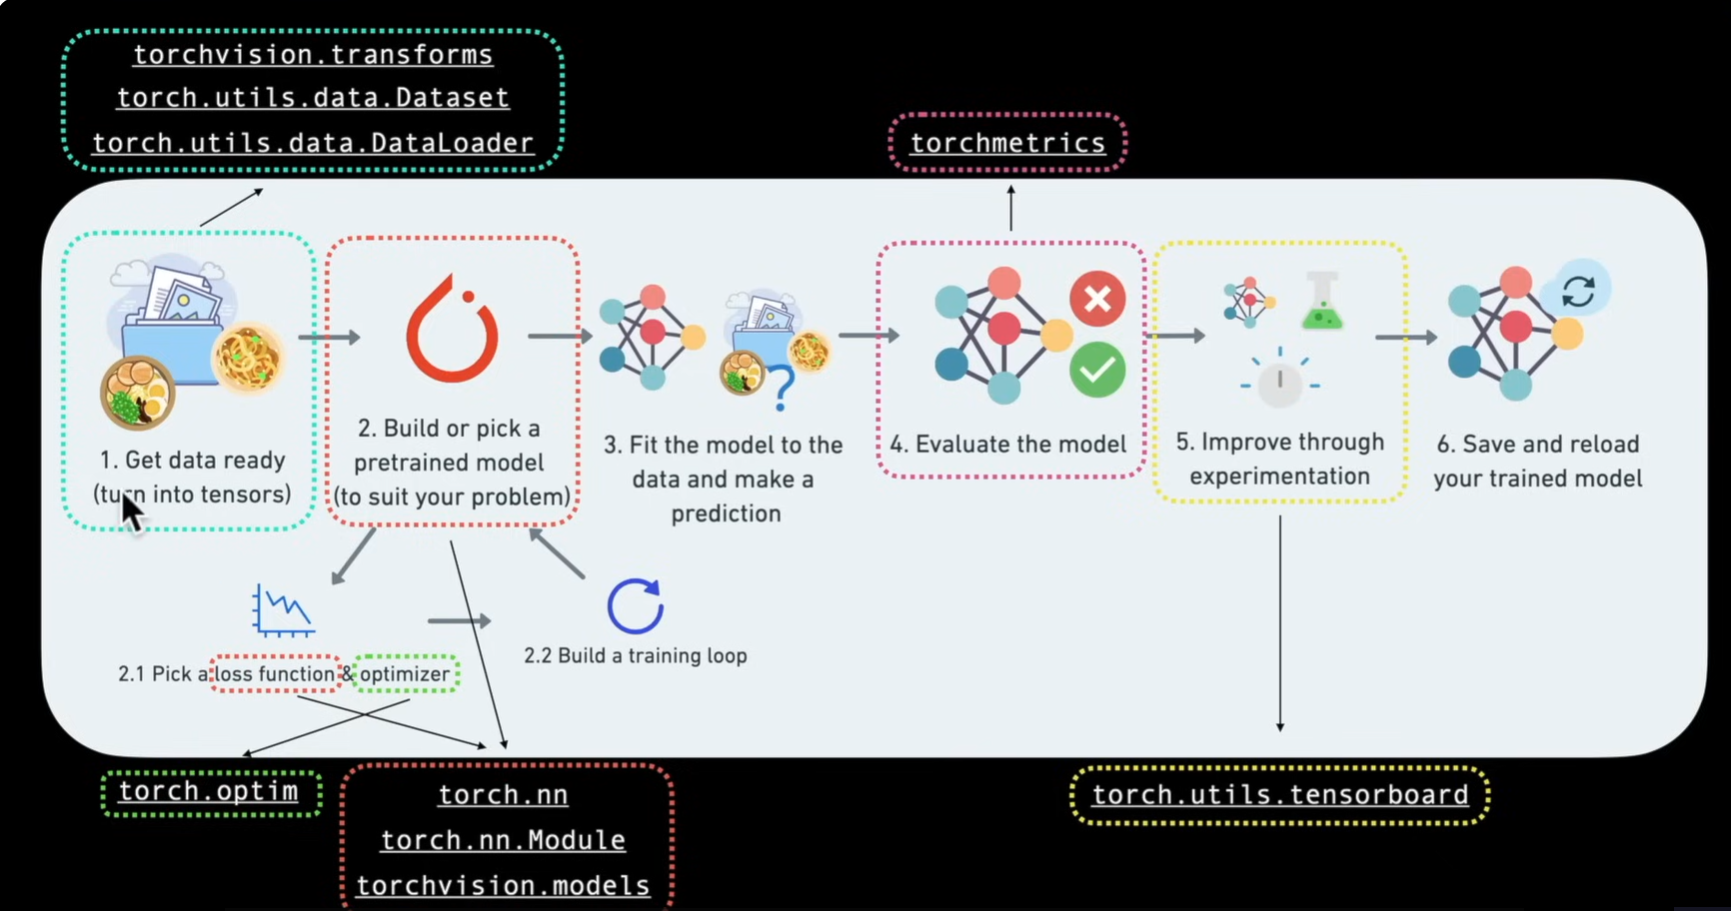